# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
ds = pd.read_csv("gld_price_data.csv")

In [3]:
ds.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
ds.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
ds.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
ds.shape

(2290, 6)

This dataset gives us the variation in gold rates and other variables over 10 years (2008-2018)

SPX - captilization rates of over 500 companies i.e, publicly traded stock prices

GLD - gold prices

USO - united states oil prices

SLV - silver prices

EUR/USD - currency pair i.e, 1 euro = whatever value is given

# Handling nul values

In [8]:
ds.isnull().any()

Date       False
SPX        False
GLD        False
USO        False
SLV        False
EUR/USD    False
dtype: bool

In [9]:
ds.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There are no null values hence we can proceed

# Statistical analysis

In [11]:
corr = ds.corr(numeric_only=True)
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


# Data visualization

<Axes: >

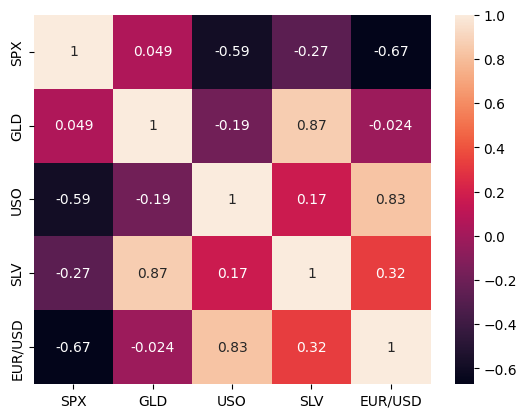

In [13]:
sns.heatmap(corr, annot=True)

In [16]:
print(corr["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


GLD is positively correlated with SPX and silver prices

GLD is negatively correlated with USO and EUR/USD prices

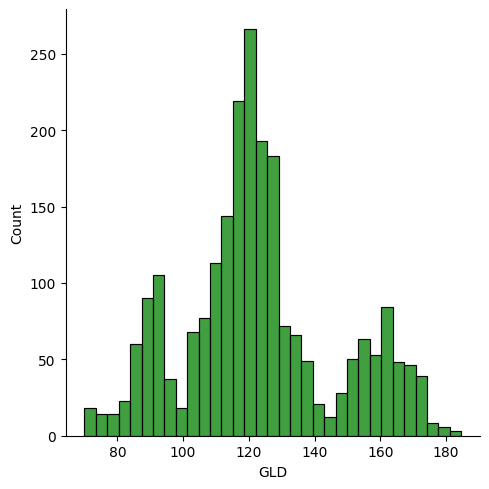

In [17]:
sns.displot(ds["GLD"], color="green")

# Outlier Detection

<Axes: >

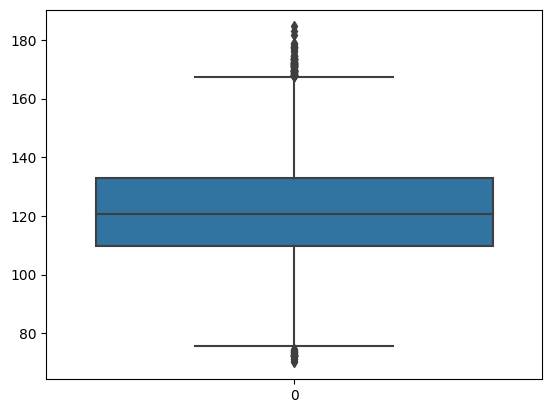

In [23]:
sns.boxplot(ds["GLD"])

<Axes: >

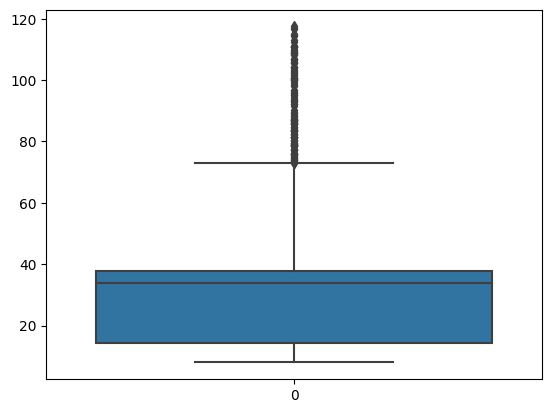

In [24]:
sns.boxplot(ds["USO"])

<Axes: >

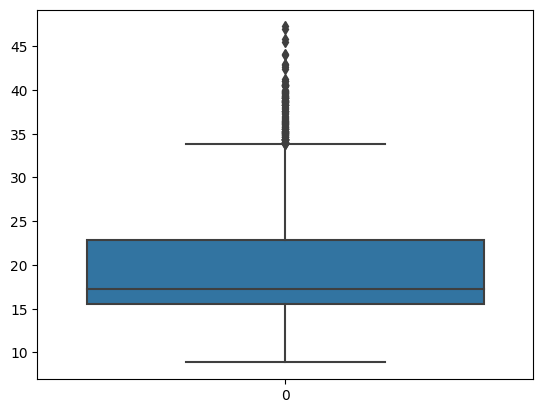

In [25]:
sns.boxplot(ds["SLV"])

# Splitting into dependent and independent variables

In [27]:
x = ds.drop(columns=["GLD", "Date"], axis=1)

In [28]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [29]:
y = ds["GLD"]

In [30]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

# Label Encoding 

All the columns have numeric data hence no need of this step

# Feature Scaling

Scaling is not needed as we are using Random Forest Classifier to create our model. It does not depend on scaled values to predict gold prices

# Splitting into training and testing set

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2, stratify=None)

We have changed stratify to None as the type of sample in y is less than 2 hence stratification based on y is not possible

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2061, 4), (229, 4), (2061,), (229,))

# Model building

We are going to use Random forest regressor for training the model as - 

1. It is an enemble model i.e, it is a combination of more than one models (multiple decision trees)

2. Can capture non-linear relationships

3. Out of bag estimation

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
model = RandomForestRegressor(n_estimators=100)
model

RandomForestRegressor()

In [39]:
model.fit(x_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_pred

array([168.69869964,  82.28960019, 114.4472001 , 127.46570073,
       121.36510023, 153.81849955, 149.6706979 , 126.13100041,
       117.46609867, 125.96300034, 116.64790121, 171.62280074,
       140.65689673, 167.85969887, 115.12939973, 117.77140091,
       138.00610337, 169.5885    , 159.54670047, 154.13879931,
       155.04349965, 125.50960032, 174.9979997 , 156.86140367,
       125.24010045,  93.70009966,  77.1743004 , 120.43170049,
       119.20060007, 167.39889923,  88.23380016, 125.21990016,
        91.14580086, 117.6590003 , 121.07849928, 135.79409946,
       115.48090149, 115.91740095, 147.15119904, 107.17530112,
       104.40640173,  86.96159767, 126.35490042, 118.00289992,
       151.68549855, 119.63450007, 108.87629924, 107.90249822,
        93.20710025, 127.23949712,  74.27320066, 113.69719934,
       120.41119895, 111.23949937, 118.96639909, 121.38039909,
       159.63140064, 166.75270079, 146.81019679,  86.34279956,
        94.34660025,  86.78949918,  91.03109943, 119.05

In [42]:
x_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
36,1371.800049,78.739998,17.990000,1.483591
619,1218.709961,38.040001,26.719999,1.377202
2172,2584.840088,11.380000,16.090000,1.166113
1931,2136.729980,11.580000,16.559999,1.106195


# Performance metrics

In [43]:
from sklearn import metrics

In [45]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error is: ", error_score)

R squared error is:  0.989160818466829


As our R squared value is close to 1, it is a good fit. Hence no need to tune it further.

# Save the model

In [48]:
import pickle

In [49]:
with open('gold_price_pred.pkl', 'wb') as file:
    pickle.dump(model, file)